# Data Science Midterm Project
Name: Christina Kong


Instructor: Professor Lasher


Lecture: CS 527: Data Science


Date: March 23, 2025 



### Importing Libraries 

In [142]:
# Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

## Data Preprocessing

### Loading the Dataset

In [55]:
# Loading the Animal Crossing New Horizon Villagers CSV file into a dataframe called 'villagers.csv'
villagers_df = pd.read_csv('villagers.csv') # 'villagers.csv' file is located in the same folder as the python notebook 

# Outputting the first five rows and last five rows of the dataframe 
villagers_df

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion,31-Jan,hay-OK,K.K. Country,Cool,Simple,White,Gray,backyard-fence wall,backyard lawn,1626;1626;5970;4003;3509;1620;1627;3467;1631;1...,hrs05,b4HwfyvThyipScSAv
387,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,snarrrl,K.K. D&B,Cool,Active,Black,Green,dark wooden-mosaic wall,stripe flooring,4117;7323;7323;3275;4109;3270;3196;4338;3200;3...,wol02,RbF2wcn6jRxtgLDRd
388,Yuka,Koala,Female,Snooty,Fashion,20-Jul,tsk tsk,Soulful K.K.,Cool,Elegant,Orange,Yellow,beige art-deco wall,simple purple flooring,3957;3955;2554;3974;3951;794;4106;3959;3958;997,kal00,QDcxk3dCNT6yeD9hk
389,Zell,Deer,Male,Smug,Music,7-Jun,pronk,K.K. Swing,Cool,Gorgeous,Purple,Gray,cityscape wall,monochromatic tile flooring,1875;863;4129;4053;4053;3951;794;3775;4046;423...,der02,LodBWtdMRZbjFNga9


In [3]:
# Inspecting the dataset using head(). This will output the top five rows of the villagers dataset. 
villagers_df.head()


,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [56]:
# Storing the dataset's number of entries and columns in a variable called shape 
shape = villagers_df.shape
rows_number = shape[0] # Accessing the first element in the shape tuple and storing it in a variable called rows 
columns_number = shape[1] # Accessing the second element in the shape tuple and storing it in a variable called columns

# Outputting the dataset's number of rows and columns 
print("Number of Rows:", rows_number)
print("Number of Columns:", columns_number)

Number of Rows: 391
Number of Columns: 17


In [57]:
# Storing villagers_df information in a variable called 'info', so I can refer to this later throughout the python notebook when needed. 
info = villagers_df.info()

# Outputting information about the villagers datatset. This includes; columns, entries, datatypes, and non-null counts. 
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

In [58]:
# Combining the 'Color1' column and 'Color2' column into one column. 
# I'm combining these two columns to perform analysis on color combinations. For instance, the frequency of unique values for each color combination. 
villagers_df['Colors'] = villagers_df['Color 1'] + villagers_df['Color 2']
villagers_df['Colors']

0         BlackBlue
1         BlueBlack
2         PinkWhite
3          RedWhite
4           RedBlue
           ...     
386       WhiteGray
387      BlackGreen
388    OrangeYellow
389      PurpleGray
390      BlueYellow
Name: Colors, Length: 391, dtype: object

In [59]:
# Combining the 'Style1' column and 'Style2' column into one column.
# I'm combining these two columns to perform analysis on style combinations. For instance, the frequency of unique values for each style combination. 
villagers_df['Styles'] = villagers_df['Style 1'] + villagers_df['Style 2']
villagers_df['Styles']

0           CoolCool
1       ActiveSimple
2      SimpleElegant
3       ActiveActive
4       SimpleSimple
           ...      
386       CoolSimple
387       CoolActive
388      CoolElegant
389     CoolGorgeous
390       SimpleCute
Name: Styles, Length: 391, dtype: object

In [60]:
# Removing the columns, 'Furniture List', 'Filename', and 'Unique Entry ID' because, I feel that these columns will not contribute to any data analysis.
# Removing columns using df.drop() method.

# Storing the three columns for removal into a single variable called 'drop_columns'. 
drop_columns = ['Furniture List', 'Filename', 'Unique Entry ID']
villagers_df.drop(columns = drop_columns, inplace=True)

In [61]:
# Creating a list of the dataframe's column names 
column_names = list(villagers_df.columns)
column_names


['Name',
 'Species',
 'Gender',
 'Personality',
 'Hobby',
 'Birthday',
 'Catchphrase',
 'Favorite Song',
 'Style 1',
 'Style 2',
 'Color 1',
 'Color 2',
 'Wallpaper',
 'Flooring',
 'Colors',
 'Styles']

### Handling Missing Data 

#### Identifying Missing Values 

In [62]:
# Identifying any missing values in the dataset by returning the total of missing values using isna() and sum() 
villagers_df.isna().sum()

Name             0
Species          0
Gender           0
Personality      0
Hobby            0
Birthday         0
Catchphrase      0
Favorite Song    0
Style 1          0
Style 2          0
Color 1          0
Color 2          0
Wallpaper        0
Flooring         0
Colors           0
Styles           0
dtype: int64

There are no missing values in the villagers dataset, so I will be skipping the following:

* Drop rows/columns with too many missing values.
* Impute missing values with the mean/median (for numerical
columns) or mode (for categorical columns). 

#### Checking for and Handling Duplicates in the Dataset 

In [64]:
# Checking which rows are duplicated by using the method duplicated(). 
# The duplicated() method returns a series of True and False values that describe which rows in the dataframe are duplicated and not.
# True = Duplicated, False = Not Duplicated

print(villagers_df.duplicated())

# Removing duplicate rows using the drop_duplicates() method. 
villagers_df.drop_duplicates(inplace = True) # (inplace = True) ensures that the method does not return a new dataframe, and remove duplicates from the original villagers_df dataframe. 

# Outputting number of rows after removing duplicates
print("\nNumber of Rows After Removing Duplicates:" ,rows_number)

0      False
1      False
2      False
3      False
4      False
       ...  
386    False
387    False
388    False
389    False
390    False
Length: 391, dtype: bool

Number of Rows After Removing Duplicates: 391


There are no duplicates in the villagers dataset. 

#### Identifying and Removing Any Outliers
Since all of the columns are categorical, I feel that unique cases or rare categories are meaningful for data analysis. Due to this, I will not be removing any outliers. Summary statistics, specifically the method value_counts() allowed me to identify outliers. These include less popular attributes like certain species, certain color combinations, certain favorite songs, and more. I have decided to keep in these outliers, because I feel that these data points are meaningful for analysis. 

## Exploratory Data Analysis (EDA)

### Summary Statistics

In [66]:
# Outputting the dataframe's column names.
column_names

['Name',
 'Species',
 'Gender',
 'Personality',
 'Hobby',
 'Birthday',
 'Catchphrase',
 'Favorite Song',
 'Style 1',
 'Style 2',
 'Color 1',
 'Color 2',
 'Wallpaper',
 'Flooring',
 'Colors',
 'Styles']

### Counting the frequency of unique values for all columns using the method value_counts().

In [223]:
# Counting the frequency of unique values for the 'Names' column
name_count = villagers_df['Name'].value_counts()
print("Number of Unique Names:\n", name_count)

# I wanted to see if there were any repeat names for the villagers. After counting, there are no repeat names. Therefore, all villagers have unique names. 

Number of Unique Names:
 Name
Admiral    1
Muffy      1
Paula      1
Patty      1
Pate       1
          ..
Elvis      1
Eloise     1
Elmer      1
Ellie      1
Zucker     1
Name: count, Length: 391, dtype: int64


In [68]:
# Counting the frequency of unique values for the 'Species' column
species_count = villagers_df['Species'].value_counts()
print("Number of Unique Species:\n", species_count)

Number of Unique Species:
 Species
Cat          23
Rabbit       20
Frog         18
Squirrel     18
Duck         17
Dog          16
Cub          16
Pig          15
Bear         15
Mouse        15
Horse        15
Bird         13
Penguin      13
Sheep        13
Elephant     11
Wolf         11
Ostrich      10
Deer         10
Eagle         9
Gorilla       9
Chicken       9
Koala         9
Goat          8
Hamster       8
Kangaroo      8
Monkey        8
Anteater      7
Hippo         7
Tiger         7
Alligator     7
Lion          7
Bull          6
Rhino         6
Cow           4
Octopus       3
Name: count, dtype: int64


In [172]:
# Counting the number of unique species in the species column
unique_species = villagers_df['Species'].nunique() # nunique() counts the number of unique elements. 

# Outputs number of different species 
print("There are",unique_species, "different species.")

There are 35 different species.


In [176]:
# Using describe() on frequency of the 'Species' column. 
species_count.describe()

# Count: 35 different species.
# Mean: The average amount of villagers in a species is 11. 
# Min: The least amount of villagers in one species is 3.
# Max: The largest amount of villagers in one species is 23.

count    35.000000
mean     11.171429
std       4.792676
min       3.000000
25%       7.500000
50%      10.000000
75%      15.000000
max      23.000000
Name: count, dtype: float64

#### 'Species' Observation
There a total of 35 unique species in the Animal Crossing New Horizons Villagers dataset. The most popular species is the Cat species, having a total of 23 villagers. The least popular species or the most rare species is the Octopus species, with only a total of 3 villagers. On average there are about 11 villagers for every species, which can indicate a fair distribution of species. 

In [224]:
# Counting the frequency of unique values for the 'Gender' column
gender_count = villagers_df['Gender'].value_counts()
print("Villager Gender Count:\n", gender_count)

# There are are total of 204 male villagers, and 187 female villagers within the villagers dataset.

Villager Gender Count:
 Gender
Male      204
Female    187
Name: count, dtype: int64


In [225]:
# Counting the frequency of unique values for the 'Personality' column
personality_count = villagers_df['Personality'].value_counts()
print("Personality Count:\n", personality_count)

# Using describe() on frequency of the 'Personality' column. 
personality_count.describe()



Personality Count:
 Personality
Lazy          60
Normal        59
Cranky        55
Snooty        55
Jock          55
Peppy         49
Smug          34
Big Sister    24
Name: count, dtype: int64


count     8.000000
mean     48.875000
std      12.977315
min      24.000000
25%      45.250000
50%      55.000000
75%      56.000000
max      60.000000
Name: count, dtype: float64

#### 'Personality' Observation
There a total of 8 different personalities in the villagers dataset. The most popular personality is Lazy, with 60 villagers having a lazy personality. The normal personality is close behind, with 59 villagers being the normal type. The least populary personality or most rare personality is the Big Sister personality, with only 24 villagers having that personality. The average number of villagers for every personality type is about 49 villagers. 

In [226]:
# Counting the frequency of unique values for the 'Hobby' column
hobby_count = villagers_df['Hobby'].value_counts()
print("Hobby Count:\n", hobby_count)

# Using describe() on frequency of the 'Hobby' column. 
hobby_count.describe()

Hobby Count:
 Hobby
Nature       66
Fitness      66
Fashion      66
Play         65
Education    64
Music        64
Name: count, dtype: int64


count     6.000000
mean     65.166667
std       0.983192
min      64.000000
25%      64.250000
50%      65.500000
75%      66.000000
max      66.000000
Name: count, dtype: float64

#### Hobby Observation 
There a total of 6 different hobbies in the villagers dataset. There is an average of 65 villagers per hobby. The top three hobbies are nature, fitness, and fashion, all with 66 villagers having that hobby. The least popular hobbies are Music and Education, with 64 villagers which is a very minor difference from the top three hobbies. The standard deviation of 0.983192 indicates that there is not much variation in the 'Hobbies' column. This suggests that the hobbies column is evenly distributed, with each hobby having a similar amount of villagers. 

In [206]:
# Counting the frequency of unique values for the 'Birthday' column
birthday_count = villagers_df['Birthday'].value_counts()
print("Birthday Count:\n", birthday_count)

Birthday Count:
 Birthday
27-Jan    2
5-Dec     2
31-Jul    2
26-Mar    2
3-Aug     2
         ..
3-Apr     1
26-Oct    1
23-Jul    1
8-Dec     1
8-Mar     1
Name: count, Length: 361, dtype: int64


In [227]:
# Counting the frequency of unique values for the 'Catchphrase' column
catchphrase_count = villagers_df['Catchphrase'].value_counts()
print("Number of Unique Catchphrases:\n", catchphrase_count)

# I wanted to see if there were any repeats of catchphrases. There is only three repeats of catchphrases, which are 'sweetie', 'quacko', and 'bloop'. 

Number of Unique Catchphrases:
 Catchphrase
sweetie       2
quacko        2
bloop         2
aye aye       1
snoot         1
             ..
yeah buddy    1
chow down     1
unh-hunh      1
tooooot       1
pronk         1
Name: count, Length: 388, dtype: int64


In [228]:
# Counting the frequency of unique values for the 'Favorite Song' column
song_count = villagers_df['Favorite Song'].value_counts()
print("Number of Unique Favorite Songs:\n", song_count)

# Using describe() on frequency of the 'Favorite Song' column. 
song_count.describe()

Number of Unique Favorite Songs:
 Favorite Song
Forest Life      15
K.K. Soul        12
K.K. Cruisin'    11
K.K. Stroll      10
Neapolitan        9
                 ..
The K. Funk       1
K.K. Aria         1
K.K. Dixie        1
K.K. Parade       1
K.K. Tango        1
Name: count, Length: 89, dtype: int64


count    89.000000
mean      4.393258
std       2.794548
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      15.000000
Name: count, dtype: float64

In [229]:
# Counting the frequency of unique values for the 'Style 1' column
style1_count = villagers_df['Style 1'].value_counts()
print("Number of Unique Style 1:\n", style1_count)

# Using describe() on frequency of the 'Style 1' column. 
style1_count.describe()

Number of Unique Style 1:
 Style 1
Simple      118
Cool         68
Cute         63
Elegant      54
Active       50
Gorgeous     38
Name: count, dtype: int64


count      6.000000
mean      65.166667
std       27.917139
min       38.000000
25%       51.000000
50%       58.500000
75%       66.750000
max      118.000000
Name: count, dtype: float64

#### Style 1 Observation
There are a total of 6 different styles. The most popular style is Simple, with 118 villagers having simple as their style 1. The least popular style is Gorgeous, with only 38 villagers having this style. On average there are 65 villagers per style 1. 

In [210]:
# Counting the frequency of unique values for the 'Style 2' column
style2_count = villagers_df['Style 2'].value_counts()
print("Number of Unique Style 2:\n", style2_count)

Number of Unique Style 2:
 Style 2
Simple      110
Cute         62
Cool         59
Elegant      56
Gorgeous     54
Active       50
Name: count, dtype: int64


In [211]:
# Counting the frequency of unique values for the 'Styles' column
styles_count = villagers_df['Styles'].value_counts()
print("Number of Unique Style Combinations:\n", styles_count)

# Using describe() on frequency of the 'Styles' column. 
styles_count.describe()

Number of Unique Style Combinations:
 Styles
SimpleSimple        33
SimpleCute          31
ActiveSimple        26
ElegantGorgeous     26
CoolSimple          25
GorgeousElegant     20
SimpleCool          20
SimpleActive        19
CuteSimple          17
CuteCute            16
CuteElegant         15
CoolGorgeous        14
CoolActive          12
ElegantCool         12
SimpleElegant       11
ActiveCool          10
CoolCool             9
CuteActive           8
GorgeousCool         8
CoolElegant          8
ElegantCute          7
CuteGorgeous         7
ElegantSimple        6
ActiveActive         6
ActiveCute           5
SimpleGorgeous       4
GorgeousActive       3
GorgeousCute         3
GorgeousSimple       3
ElegantActive        2
ActiveGorgeous       2
ElegantElegant       1
GorgeousGorgeous     1
ActiveElegant        1
Name: count, dtype: int64


count    34.000000
mean     11.500000
std       9.026057
min       1.000000
25%       4.250000
50%       8.500000
75%      16.750000
max      33.000000
Name: count, dtype: float64

#### Style Combinations Observation 
There are a total of 34 different style combinations. The most popular style combination was "Simple + Simple", with a total of 33 villagers having simple as both their style 1 and style 2. The least three popular style combinations was "Elegant + Elegant", "Gorgeous + Gorgeous", and "Active + Elegant", with only one villager for each of the style combinations. On average, there were 11.5 villagers for each style combination. 

In [212]:
# Counting the frequency of unique values for the 'Color 1' column
color1_count = villagers_df['Color 1'].value_counts()
print("Number of Unique Color 1:\n", color1_count)

# Using describe() on frequency of the 'Color 1' column. 
color1_count.describe()

Number of Unique Color 1:
 Color 1
Black         47
Blue          46
Green         44
Red           43
Yellow        31
Purple        30
Pink          29
Light blue    21
Orange        19
Colorful      17
Beige         17
White         17
Brown         15
Gray          15
Name: count, dtype: int64


count    14.000000
mean     27.928571
std      12.437315
min      15.000000
25%      17.000000
50%      25.000000
75%      40.000000
max      47.000000
Name: count, dtype: float64

#### Color 1 Observation 
There were a total of 14 different colors in the villagers dataset. The most popular color was black, with 47 villagers having black as their color 1. The least two popular colors wee brown and gray, with only 15 villagers having these colors as their color 1. On average, there were 28 villagers for each color. 

In [213]:
# Counting the frequency of unique values for the 'Color 2' column
color2_count = villagers_df['Color 2'].value_counts()
print("Number of Unique Color 2:\n", color2_count)

Number of Unique Color 2:
 Color 2
Red           53
White         45
Blue          38
Yellow        36
Gray          29
Black         25
Pink          24
Green         24
Purple        23
Orange        22
Light blue    21
Beige         18
Colorful      17
Brown         16
Name: count, dtype: int64


In [214]:
# Counting the frequency of unique values for the 'Colors' column
colors_count = villagers_df['Colors'].value_counts()
print("Number of Unique Color Combinations:\n", colors_count)

# Using describe() on frequency of the 'Colors' column. 
colors_count.describe()

Number of Unique Color Combinations:
 Colors
BlackGray           16
BlueWhite           10
BlueLight blue       9
PinkWhite            8
PinkRed              8
                    ..
PurpleLight blue     1
WhiteYellow          1
BlackBeige           1
GrayGray             1
PurpleGray           1
Name: count, Length: 141, dtype: int64


count    141.000000
mean       2.773050
std        2.355446
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       16.000000
Name: count, dtype: float64

#### Color Combinations Observation
There were a total of 141 unique color combinations in the villagers dataset. The most popular color combination was "Black + Gray", with 16 villagers having this color combination. 

In [215]:
# Counting the frequency of unique values for the 'Wallpaper' column
wallpaper_count = villagers_df['Wallpaper'].value_counts()
print("Number of Unique Wallpaper:\n", wallpaper_count)

# Using describe() on frequency of the 'Wallpaper' column. 
wallpaper_count.describe()

Number of Unique Wallpaper:
 Wallpaper
backyard-fence wall          13
concrete wall                11
arched-window wall            8
ice wall                      8
white botanical-tile wall     7
                             ..
honeycomb wall                1
yellow quilt wall             1
red-brick wall                1
blue painted-wood wall        1
blue intricate wall           1
Name: count, Length: 154, dtype: int64


count    154.000000
mean       2.538961
std        2.000435
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: count, dtype: float64

#### Wallpaper Observation
There are a total of 154 unique wallpapers. The most popular wallpaper was the backyard-fence wall, with 13 villagers having this as their wallpaper. On average, there were 2.5 villagers for every wallpaper. 

In [216]:
# Counting the frequency of unique values for the 'Flooring' column
flooring_count = villagers_df['Flooring'].value_counts()
print("Number of Unique Flooring:\n", flooring_count)

# Using describe() on frequency of the 'Flooring' column. 
flooring_count.describe()

Number of Unique Flooring:
 Flooring
backyard lawn                  13
rosewood flooring              11
simple white flooring          11
monochromatic tile flooring    11
wooden-knot flooring           11
                               ..
flagstone flooring              1
green-paint flooring            1
kitschy tile                    1
blue camo flooring              1
floral mosaic-tile flooring     1
Name: count, Length: 128, dtype: int64


count    128.000000
mean       3.054688
std        2.431126
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       13.000000
Name: count, dtype: float64

#### Flooring Observation
There are a total of 128 unique flooring in the villagers dataset. The most popular flooring was the backyard lawn, with 13 villagers having this as their flooring. On average, there was 3 villagers for every flooring. 

### Visualizations

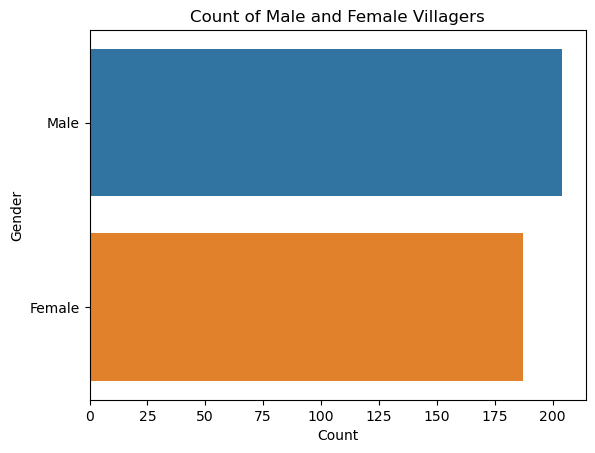

In [230]:
# Seaborn countplot to visualize the count of male and female villagers 
sns.countplot(data = villagers_df, y = 'Gender', hue = "Gender")

# Adding labels to the plot
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Count of Male and Female Villagers")

# Outputting the plot
plt.show()

#### Count of Male and Female Villagers Barplot Observation
There are more male villagers than female villagers. 

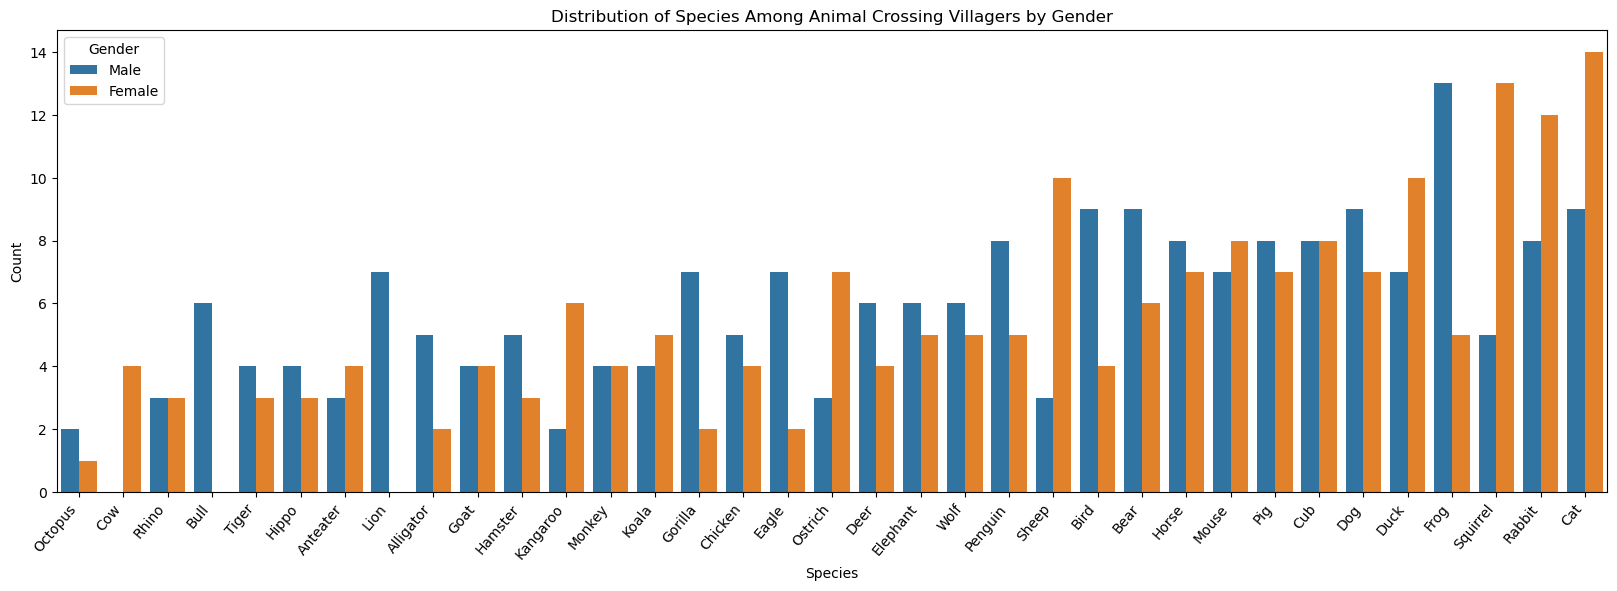

In [231]:
# Bar graph for displaying the occurences of each species in the villagers dataset by gender using seaborn.

# Adjusting the width and height of the plot. 
plt.figure(figsize=(20, 6))

# Assigning ascending order to species based on count. 
ascending_order = villagers_df['Species'].value_counts(ascending=True).index

# Seaborn countplot to display the number of villagers per species, sorted in ascending order. 
sns.countplot(data = villagers_df, x = 'Species', order = ascending_order, hue = 'Gender')

# Rotating the x-axis labels to prevent overlapping due to the amount of different species.
plt.xticks(rotation = 50, ha = 'right')

# Adding labels to the plot
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of Species Among Animal Crossing Villagers by Gender")

# Outputting the plot
plt.show()

#### Distribution of Species Among Animal Crossing Villagers by Gender Barplot Observation 
There are more female cat villagers than male cat villagers. For certain species, there are only female villagers or only male villagers. For instance, there are only female cow villagers and only male bull villagers. The least popular species is the octopus, while cat is the most popular species. The monkey species appears to have an equal amount of female and male villagers, as well as the rhino, and goat species. 

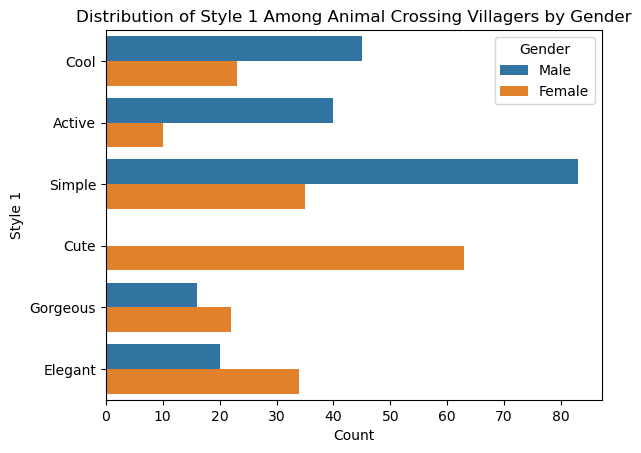

In [232]:
# Bar graph for displaying the distribution of 'Style 1' in the villagers dataset by gender using seaborn.

# Seaborn countplot to show number of occurrences of each style by gender
sns.countplot(data = villagers_df, y = 'Style 1', hue = "Gender")

# Adding labels to the plot
plt.xlabel("Count")
plt.ylabel("Style 1")
plt.title("Distribution of Style 1 Among Animal Crossing Villagers by Gender")

# Outputting the plot
plt.show()

#### Distribution of Style 1 Among Animal Crossing Villagers by Gender Observation 
There are more male villagers that have simple as their style 1 compared to female villagers. For the elegant style, there are more female villagers. Also there are no male villagers that have cute as their style 1. These certain trends suggest that villagers will have certain styles depending on their gender.

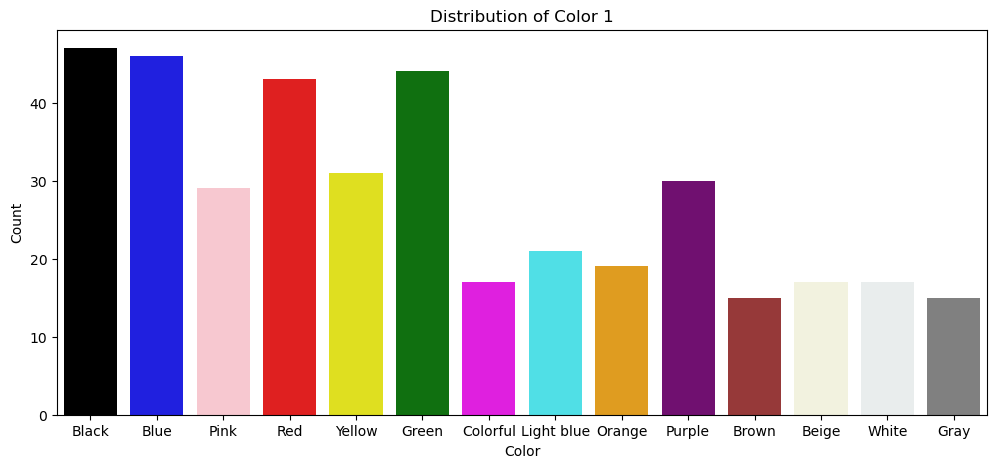

In [233]:
# Bar graph for displaying the color 1 distribution of the villagers dataset using seaborn.

# Adjusting the width and height of the plot. 
plt.figure(figsize=(12, 5))

# Seaborn countplot to show unique occurences of color 1
sns.countplot(data = villagers_df, x = 'Color 1', hue= 'Color 1', palette = ['black', 'blue', 'pink', 'red', 'yellow', 'green', '#ff00ff', '#37f6ff', 'orange', 'purple', 'brown', 'beige', '#e8eeed', 'gray']) # assigning specific colors to bars

# Adding labels to the plot
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Distribution of Color 1")

# Outputting the plot
plt.show()

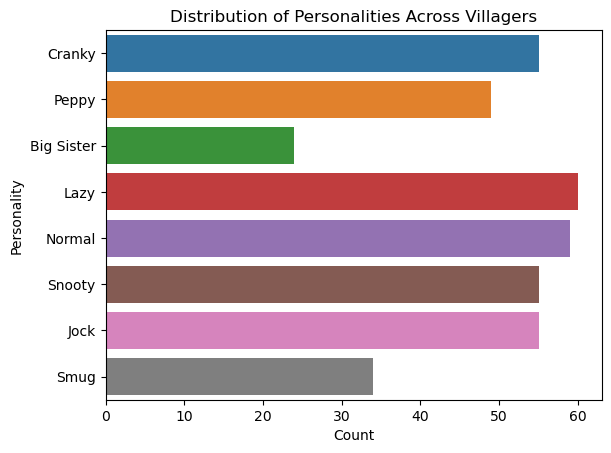

In [234]:
# Bar graph for displaying the personality distribution of the villagers dataset using seaborn.

# Seaborn countplot to show number of male and female villagers 
sns.countplot(data = villagers_df, y = 'Personality', hue = "Personality")

# Adding labels to the plot
plt.xlabel("Count")
plt.ylabel("Personality")
plt.title("Distribution of Personalities Across Villagers")

# Outputting the plot
plt.show()

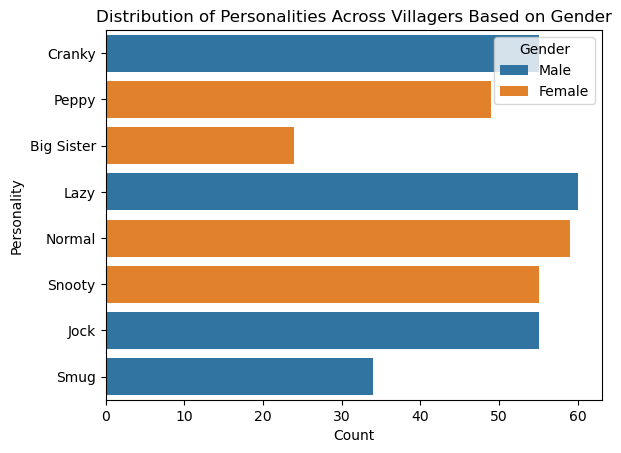

In [235]:
# Bar graph for displaying the personality distribution of the villagers dataset based on gender using seaborn.

# Seaborn countplot to show unique number of personalities based on gender 
sns.countplot(data = villagers_df, y = 'Personality', hue = "Gender")

# Adding labels to the plot
plt.xlabel("Count")
plt.ylabel("Personality")
plt.title("Distribution of Personalities Across Villagers Based on Gender")

# Outputting the plot
plt.show()

#### Distribution of Personalities Across Villagers Based on Gender Observation
Each personality will have only one gender. For example, smug villagers are only male while peppy villagers are only female. This suggests that a villager's personality is dependent on their gender. Female villagers could only have the peppy, big sister, normal, or snooty personaly. Male villagers wil only have the cranky, lazy, jock, and smug personality. 

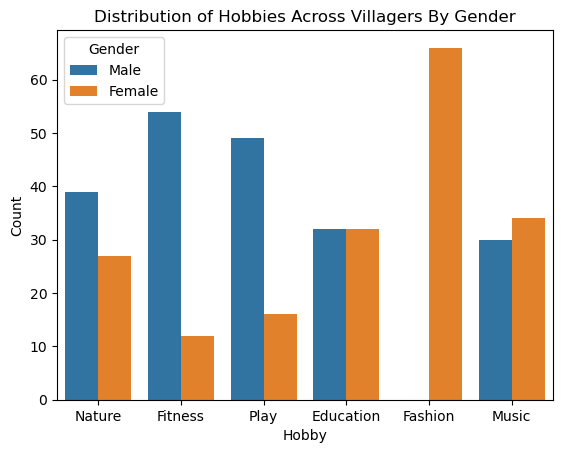

In [236]:
# Bar graph for displaying the hobby distribution of the villagers dataset by gender using seaborn.

# Seaborn countplot to show the distribution of hobbies by gender
sns.countplot(data = villagers_df, x = 'Hobby', hue = "Gender")

# Adding labels to the plot
plt.xlabel("Hobby")
plt.ylabel("Count")
plt.title("Distribution of Hobbies Across Villagers By Gender")

# Outputting the plot
plt.show()

#### Distribution of Hobbies Across Villagers By Gender Observation
There are only female villagers with the fashion hobby. There are more male villagers with the fitness hobby than female villagers. Education has an equal amount of male and female villagers. These trends suggest that certain hobbies are dependent on a villager's gender. For instance, no male villagers can have the fashion hobby. Also, a male villager is more likely to have a fitness hobby than a female villager. 

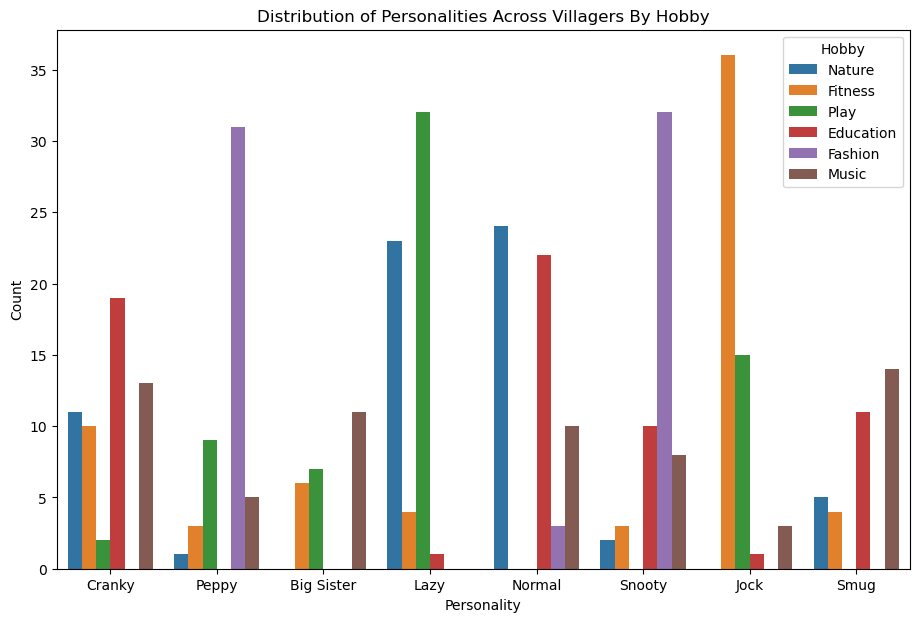

In [237]:
# Bar graph for displaying the personality distribution of the villagers dataset by hobby using seaborn.

# Adjusting the width and height of the plot. 
plt.figure(figsize=(11, 7))

# Seaborn countplot to show the distribution of hobbies by gender
sns.countplot(data = villagers_df, x = 'Personality', hue = "Hobby")

# Adding labels to the plot
plt.xlabel("Personality")
plt.ylabel("Count")
plt.title("Distribution of Personalities Across Villagers By Hobby")

# Outputting the plot
plt.show()

#### Distribution of Hobbies Across Villagers By Hobby Observation 
This bar plot suggests that villagers with certain personalities will not have certain hobbies. For example, smug villagers will not have the play hobby or fashion hobby. This suggests that a villager's personality will impact which hobby they will have. 

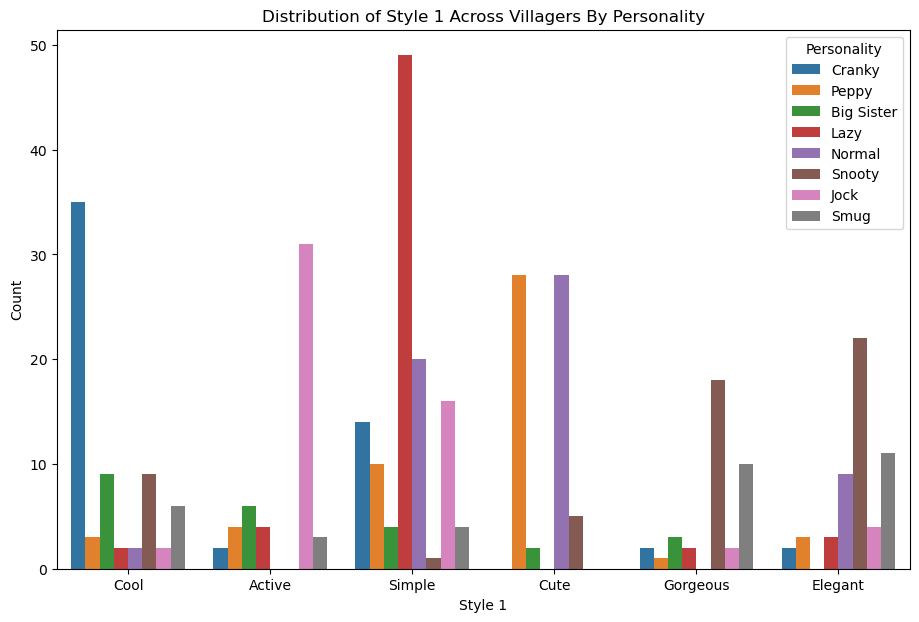

In [43]:
# Bar graph for displaying the style 1 distribution of the villagers dataset by personality using seaborn.

# Adjusting the width and height of the plot. 
plt.figure(figsize=(11, 7))

# Seaborn countplot to show the distribution of style 1 by personality 
sns.countplot(data = villagers_df, x = 'Style 1', hue = "Personality")

# Adding labels to the plot
plt.xlabel("Style 1")
plt.ylabel("Count")
plt.title("Distribution of Style 1 Across Villagers By Personality")

# Outputting the plot
plt.show()

#### Distribution of Style 1 Across Villagers By Personality Observation
The bar plot suggests that villagers with certain personalities will have certain styles as their style 1. For example, villagers with the normal personality will not have gorgeous as their style 1. Also, normal and snooty villagers will not have active as their style 1. 

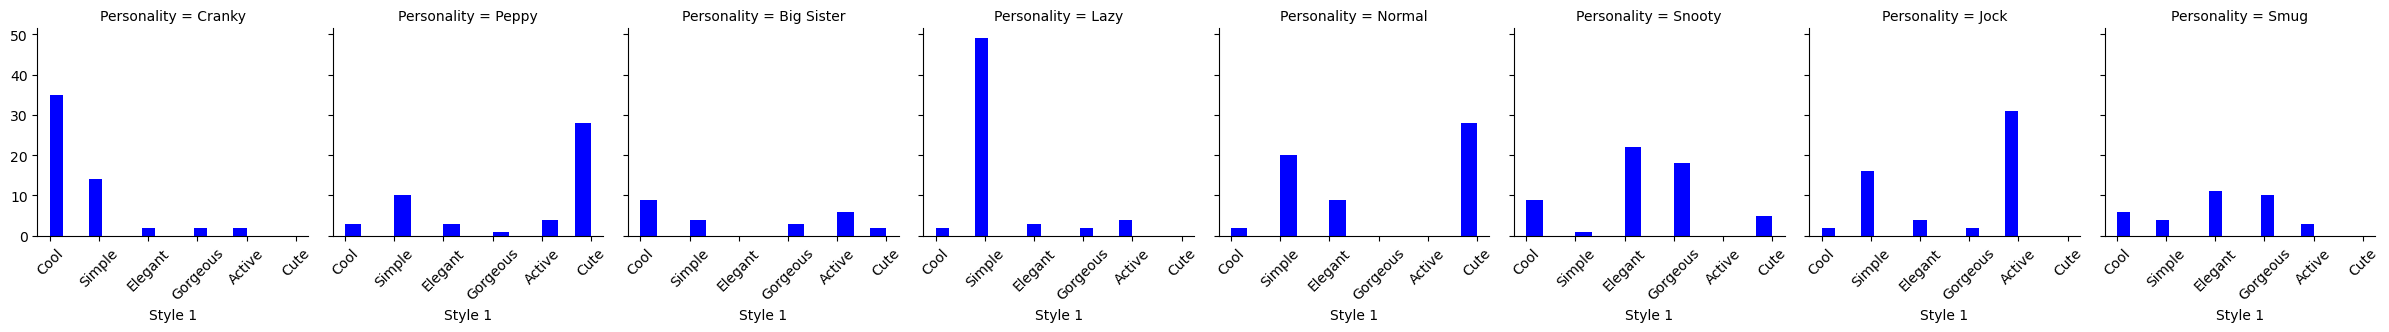

In [137]:
# Facet grid showing distributions of style 1 for each villager's personality using seaborn.

# Defining facet grid showcasing the styles for each personality. 
facet_grid = sns.FacetGrid(villagers_df, col ='Personality') 

# Adding attributes to the facet_grid
facet_grid.map(plt.hist, 'Style 1', bins = 15, color = 'blue') 

# Rotating the style labels to ensure readability and no overlapping 
facet_grid.set_xticklabels(rotation=45)

# Outputting facet grid 
plt.show() 

#### Facet Grid 1 Observation 
Facet Grid 1 displays the distribution of style 1 for each villager's personality. A majority of cranky villagers will have cool as their style 1. A majority of peppy villagers will have cute as their style 1. Most of lazy villagers have simple as their style 1. These trends suggest that there is a relationship between personality and style 1. Certain personalities will gravitate towards certain styles. Thus, personality can have a dependence on style 1. 

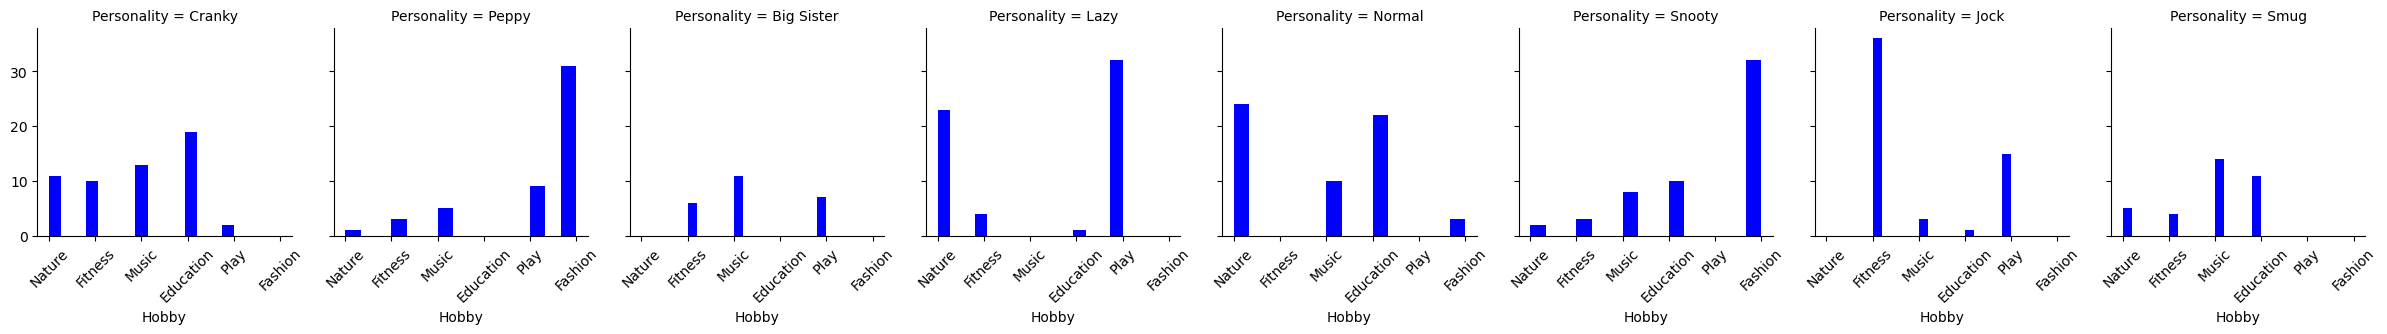

In [139]:
# Facet grid showing distributions of hobbies for each villager's personality using seaborn.

# Defining facet grid showcasing the styles for each personality. 
facet_grid = sns.FacetGrid(villagers_df, col ='Personality') 

# Adding attributes to the facet_grid
facet_grid.map(plt.hist, 'Hobby', bins = 15, color = 'blue') 

# Rotating the style labels to ensure readability and no overlapping 
facet_grid.set_xticklabels(rotation=45)

# Outputting facet grid 
plt.show() 

#### Facet Grid 2 Observation 
Facet grid 2 showcases the distributions of hobbies for each villager's personaility. Judging by the grid, there is a strong relation between personaility and hobby. Certain personalities will have certain hobbies. For instance, a peppy villager will most likely have fashion as their hobby. While a jock villager will most likely have fitness as their hobby. 

## Data Visualization (Advanced)


### Creating heatmaps for certain columns of the villagers dataset 

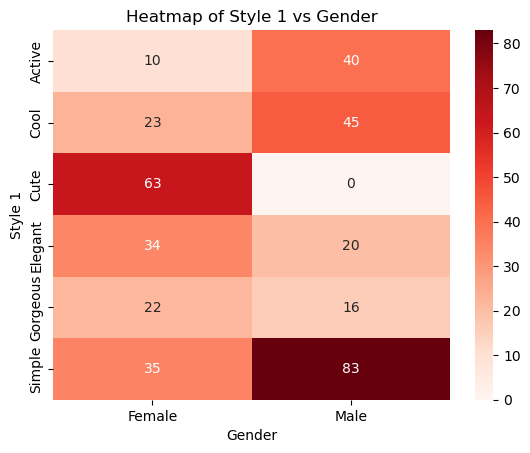

In [133]:
# Create a cross-tabulation of the Style 1 and Gender columns
heatmap_data = pd.crosstab(villagers_df['Style 1'], villagers_df['Gender'])

# Plotting heatmap
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Style 1 vs Gender')

# Displaying heatmap 
plt.show()

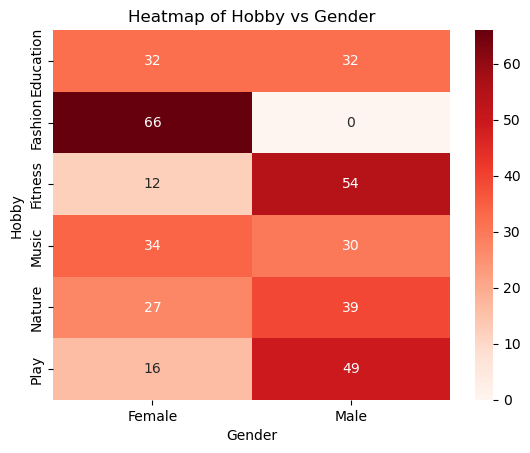

In [134]:
# Creating a cross-tabulation of the Hobby and Gender columns
heatmap_data = pd.crosstab(villagers_df['Hobby'], villagers_df['Gender'])

# Plotting heatmap 
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Hobby vs Gender')

# Displaying the heatmap
plt.show()

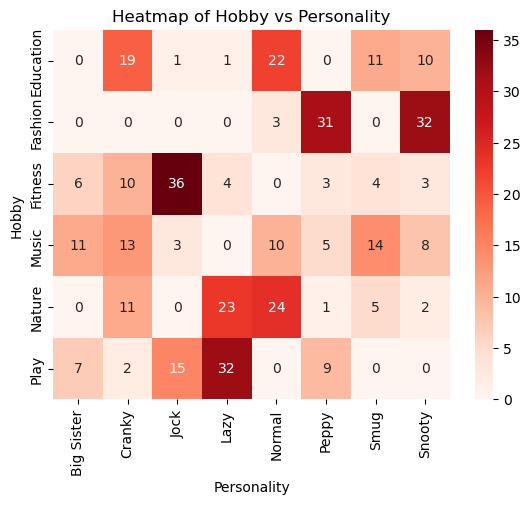

In [141]:
# Creating a cross-tabulation of the Hobby and Gender columns
heatmap_data = pd.crosstab(villagers_df['Hobby'], villagers_df['Personality'])

# Plotting heatmap 
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt='d')
plt.title('Heatmap of Hobby vs Personality')

# Displaying the heatmap
plt.show()

## Basic Statistical Analysis


In [221]:
# Performing a chi-squared test between hobby and personality 

# Creating a contingency table of the hobby and personality columns to be used for the chi-squared test. 
contingency_table = pd.crosstab(villagers_df['Hobby'], villagers_df['Personality'])

# Perform Chi-Squared test
chi_squared_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Outputting statistics 
print("Chi-Squared Statistic:", chi_squared_stat) # Represents the difference between the observed and expected frequencies. 
print("P-Value:", p_val) # Also probability rate, represents the likelihood of obtaining an observed result under the null hypothesis. 
print("Degrees of Freedom:", dof) # Represents the number of independent values that can vary. 
print("\nExpected Frequencies Table:\n", expected) # Represents the counts expected if the null hypothesis is true in a table. 

# Outputting the result based on the p value. 
# If the p value is less than the significance value (alpha = 0.05) than it indicates a strong association between hobby and personality. Which rejects the null hypothesis.
# If the p value is greater than the significance value, it indicates a weak association between hobby and personality. Which fails to reject the null hypothesis. 


alpha = 0.05

if p_val <= alpha:
    print("\nThere is a significant sssociation between Hobby and Personality")
else:
    print("\nThere is not a significant Association between Hobby and Personality")

# null hypothesis - The claim that the effect being studied does not exist. In this case, the claim that there is a strong association between hobby and personality does not exist. 

Chi-Squared Statistic: 509.6668652638607
P-Value: 1.338974537728872e-85
Degrees of Freedom: 35

Expected Frequencies Table:
 [[ 3.92838875  9.00255754  9.00255754  9.82097187  9.657289    8.02046036
   5.56521739  9.00255754]
 [ 4.0511509   9.28388747  9.28388747 10.12787724  9.95907928  8.27109974
   5.73913043  9.28388747]
 [ 4.0511509   9.28388747  9.28388747 10.12787724  9.95907928  8.27109974
   5.73913043  9.28388747]
 [ 3.92838875  9.00255754  9.00255754  9.82097187  9.657289    8.02046036
   5.56521739  9.00255754]
 [ 4.0511509   9.28388747  9.28388747 10.12787724  9.95907928  8.27109974
   5.73913043  9.28388747]
 [ 3.98976982  9.14322251  9.14322251  9.97442455  9.80818414  8.14578005
   5.65217391  9.14322251]]

There is a significant sssociation between Hobby and Personality


### Chi-Squared Test Interpretation 

After performing a chi-squared test to assess the independence between the categorical variables hobby and personality, I have found that there is a significant association between hobby and personality. This indicates that hobby and personality are dependent of each other. Hobby and personality are not independent, and can influence each other. For an example, a villager with a lazy personality is more likely to have a 'Play' hobby. Also, a villager with a 'Jock' personality is more likely to have a hobby in 'Fitness'. 

## Summary
Exploratory Questions

### Data Understanding 
The original 17 columns in the Animal Crossing New Horizons Villagers dataset are:
* Name
* Species 
* Gender
* Personality
* Hobby
* Birthday
* Catchphrase
* Favorite Song
* Style 1
* Style 2
* Color 1
* Color 2
* Wallpaper
* Flooring
* Furniture List
* Filename
* Unique Entry ID

Explanations: (From the Kaggle website there was not a description for the columns, so the descriptions are based on my experience with playing the game and own observations. )
* Name - The 'Name' column represents every villager's name. Each villager has their own unique name, and there are no repeated names. 
* Species - The 'Species' column represents the villager's species. There are a total of 35 different species in the dataset. The different species are
* Gender - The 'Gender' column represents the villager's gender. 
* Personality - The 'Personality' column represents the type of personality the villager has. There a total of 8 different personalities.
* Hobby - The 'Hobby' column represents a villager's favorite hobby. There are a total of 6 different hobbies. 
* Birthday - This column represents the villager's birthday. When playing the game, if the current day is a villager's birthday you have the option to give them a birthday gift or visit their house where there will be a birthday party for them. 
* Catchphrase - This column represents a villager's catchphrase. When speaking to a villager, they will often include their catchphrase in their dialogue. During the game you have the option of editing their catchphrase if the villager asks you to. 
* Favorite Song - The 'Favorite Song' column represents a villager's favorite song. There is a character in the game named K.K. Slider who is the artist of all the songs. When visiting a villager's house if they have a stereo, the stereo will play their favorite song. 
* Style 1 - This column represents a villager's favorite style. Usually villagers will have two favorite styles, which is why there is a Style 1 column and Style 2 column. If a villager does not have a second different favorite style, the style will be repeated. For instance, if a villager's only favorite style is Simple, it will be marked as Simple in both Style 1 column and Style 2 column. A favorite style indicates that a villager will like a gift given to them in that particular style, and will often wear clothing in that particular style. 
* Style 2 - This column represents a villager's second favorite style. 
* Color 1 - This column represents a villager's favorite color.
* Color 2 - This column represents a villager's second favorite color. 
* Wallpaper - This column represents a villager's default wallpaper for their house.
* Flooring - This column represents a villager's default flooring for their house.
* Furniture List - I believe this column holds the list of furniture a villager will have in their default house depicted by the number id for each furniture. 
* Filename - This column represents the villager's filename within the game files. 
* Unique Entry ID - This column represents a unique id number for each entry. 

### Data Cleaning 
There were no missing values or duplicates in the dataset, so I did not remove any missing values or duplicates. For outliers, I decided to not remove any. Outliers for this dataset would have been least popular species, or personality. For example, there were only three villagers with the 'Octopus' species. I felt that I should leave them in the dataframe, because they provide meaningful insight to data analysis. If I removed them, it could introduce bias to the dataset. 

### Visualization 

After creating visualizations (barplot and heatmaps) for certain columns, I have discovered trends that suggest relationships between the categorical variables. For instance, there is a strong relationship between personality and hobby. A villager's personality strongly dictates which hobbies they will have. Also, there is a strong relation between gender and personality. A villager's gender will decide which personality types they will have. The Distribution of Personalities Across Villagers Based on Gender bar plot was able to effectly visualize this relationship. The bar plot showcases that there are four possible personalities for each gender. 



### Statistical Analysis 
The hypothesis test that I chose was the chi-squared test to assess independence between hobby and personality. I chose this test in order to determine if there was a strong or weak relationship between hobby and personality. My initial guess was that there was a strong relation between hobby and personality. According to the heatmap, a majority of lazy villagers had the 'Play' hobby. After conducting the chi-squared test, the result was a significant association between hobby and personality thus rejecting the null hypothesis. This means that there is no independence between hobby and personality, suggesting that villagers will have certain hobbies based on their personality. 

### Conclusions
After my analysis, I have learned that a villager's personality is often tied with their hobby and favorite style. I also have discovered that there are more male villagers than female villagers. The most popular species is the cat species, and the most rare species is the octopus species. 

Further analysis that I would like to perform is logistic regression. Performing research on predicting the personality of the villager based on different criteria like species, hobby, favorite style, and so on. I could also in addition try to predict a villager's species based on different criteria. Also in the future I would like to perform one hot encoding to convert categorical variables into a binary format. For instance, performing one hot encoding on the 'Gender' column or 'Personality' column to help with performing algorithms like linear or logistic regression. Also, in the future I would like to add numerical columns to the dataframe. Columns like a villager's height, weight, or age. Since these types of information is not available in the game, I could randomly generate mock data for those columns. 